<a href="https://colab.research.google.com/github/SYWoo02/Engineer_BigData_Analysis_10/blob/main/%5Bpy%5D_T1_1_%EC%9D%B4%EC%83%81%EC%B9%98%EB%A5%BC_%EC%B0%BE%EC%95%84%EB%9D%BC(IQR%ED%99%9C%EC%9A%A9)_Expected_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T1-1. 이상치를 찾아라
## 데이터에서 IQR을 활용해 Fare컬럼의 이상치를 찾고, 이상치 데이터의 여성 수를 구하시오
- 강의 영상 : https://youtu.be/ipBW5D_UJEo
- 데이터셋 : titanic
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 데이터 위치 "../input/titanic/train.csv" (copy&edit가 아닐 경우 별도로 데이터셋 불러와야 함)

## 라이브러리 및 데이터 불러오기

In [4]:
import pandas as pd
data = pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 간단한 탐색적 데이터 분석 (EDA)

<Axes: >

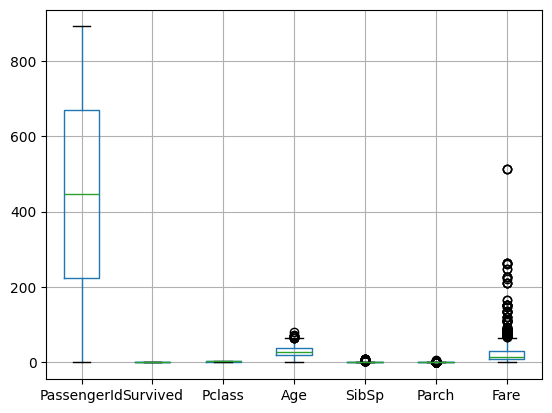

In [5]:
data.boxplot()

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## IQR 구하기 (Fare컬럼)

In [8]:
Q1 = data["Fare"].quantile(0.25)
Q3 = data["Fare"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

23.0896


## 이상치 데이터 구하기

In [16]:
outlier1 = data["Fare"] < Q1 - IQR * 1.5
outlier2 = data["Fare"] > Q3 + IQR * 1.5
print(len(data[outlier1]), len(data[outlier2]))

outlier = data[outlier1 | outlier2]
outlier

0 116


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


## 이상치 데이터에서 여성 수 구하기, 출력하기 print()

In [13]:
f = outlier["Sex"] == 'female'
print(len(outlier[f]))

70
